# A simple two-layer neural network from scratch with Pytorch

In [2]:
# Import & setup
import numpy as np
import matplotlib.pyplot as plt
import torch

device = torch.device('cpu')

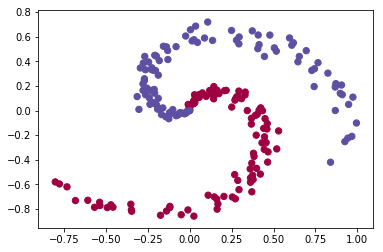

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D), dtype=np.float32) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
yc = np.zeros((N*K,2), dtype=np.float32)
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    if j == 0:
        yc[ix] = np.matrix([[1, 0]])
    else:
        yc[ix] = np.matrix([[0, 1]])
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# some hyperparameters
h = 100 # size of hidden layer
learning_rate = 1e-4
num_epochs = 2000

In [22]:
# convert X and yc data from numpy to torch Tensors
Xt = torch.from_numpy(X)
yct = torch.from_numpy(yc)
print("X:   ", "BEFORE: ", X.shape, " and AFTER: " , Xt.size(), "\nyc:  ", "BEFORE: ", yc.shape, " and AFTER: " , yct.size(),)

# initialize parameters randomly
W1 = 0.1 * torch.randn(D,h)
W2 = 0.1 * torch.randn(h,K)

X:    BEFORE:  (200, 2)  and AFTER:  torch.Size([200, 2]) 
yc:   BEFORE:  (200, 2)  and AFTER:  torch.Size([200, 2])


In [28]:
def relu(x):
    return np.maximum(0.0,x)

def relu_derivative(output):
    output[output <= 0] = 0
    output[output>0] = 1
    return output

In [46]:
# gradient descent loop
print(Xt.size(0)) # 200 rows
for i in range(num_epochs):
    m1 = torch.mm(Xt,W1)
    a1 = relu(m1)
    a2 = torch.mm(a1, W2)
    #print(a1.shape, W2.shape, m2.shape, yc.shape)
    loss = torch.sum((a2 - yct)**2)
    if i % 10000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    dlossda2 = 2*(a2 - yct)
    da2da1 = W2
    da2dW2 = a1
    
    dm1dW1 = Xt
    dlossdW2 = torch.mm(torch.transpose(da2dW2, 0, 1), dlossda2) 
        
    dloss1 = torch.mm(dlossda2, torch.transpose(da2da1, 0, 1))
    dloss2 = relu_derivative(a1) * dloss1
    
    dlossdW1 = torch.mm(torch.transpose(dm1dW1, 0, 1), dloss1)
    #     print(dlossdW1.shape)

    W1 -= (learning_rate * dlossdW1)
    W2 -= (learning_rate * dlossdW2)

200
iteration 0: loss 186.209137


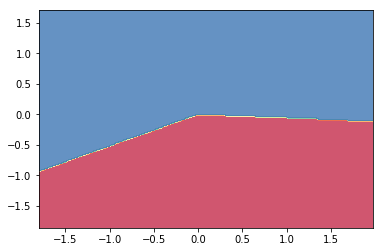

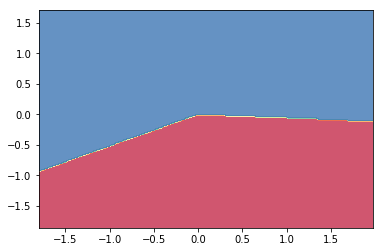

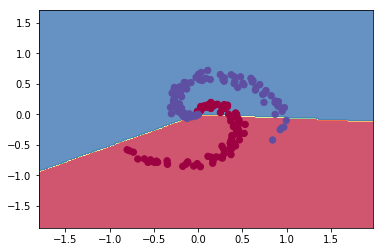

In [49]:
# plot the resulting classifier
h = 0.02
x_min, x_max = Xt[:, 0].min() - 1, Xt[:, 0].max() + 1
y_min, y_max = Xt[:, 1].min() - 1, Xt[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1.numpy())), W2.numpy())
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(Xt[:, 0].numpy(), Xt[:, 1].numpy(), c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()